<a href="https://colab.research.google.com/github/Rahafzsh/ComputerVisionTasks/blob/main/Lab1/CVLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Image Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Task 1: Preprocessing and Data Augmentation

* **STEP 1:** Import required libraries

In [22]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import tensorflow_hub as hub

In [24]:
data_dir= pathlib.Path('/content/drive/MyDrive/ComputerVisionTasks/Lab1/PandasBears/Train')
class_names = [item.name for item in data_dir.glob('*')][:2]
print(class_names)

['Pandas', 'Bears']


In [25]:
train_folder = '/content/drive/MyDrive/ComputerVisionTasks/Lab1/PandasBears/Train/'
test_folder = '/content/drive/MyDrive/ComputerVisionTasks/Lab1/PandasBears/Test/'
data_dir = '/content/drive/MyDrive/ComputerVisionTasks/Lab1/PandasBears/Train/'

In [27]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(train_folder,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')

Found 400 images belonging to 2 classes.


In [28]:
val_data = data_gen.flow_from_directory(data_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [29]:
test_data = data_gen.flow_from_directory(test_folder,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [30]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

### Displaying some samples of training

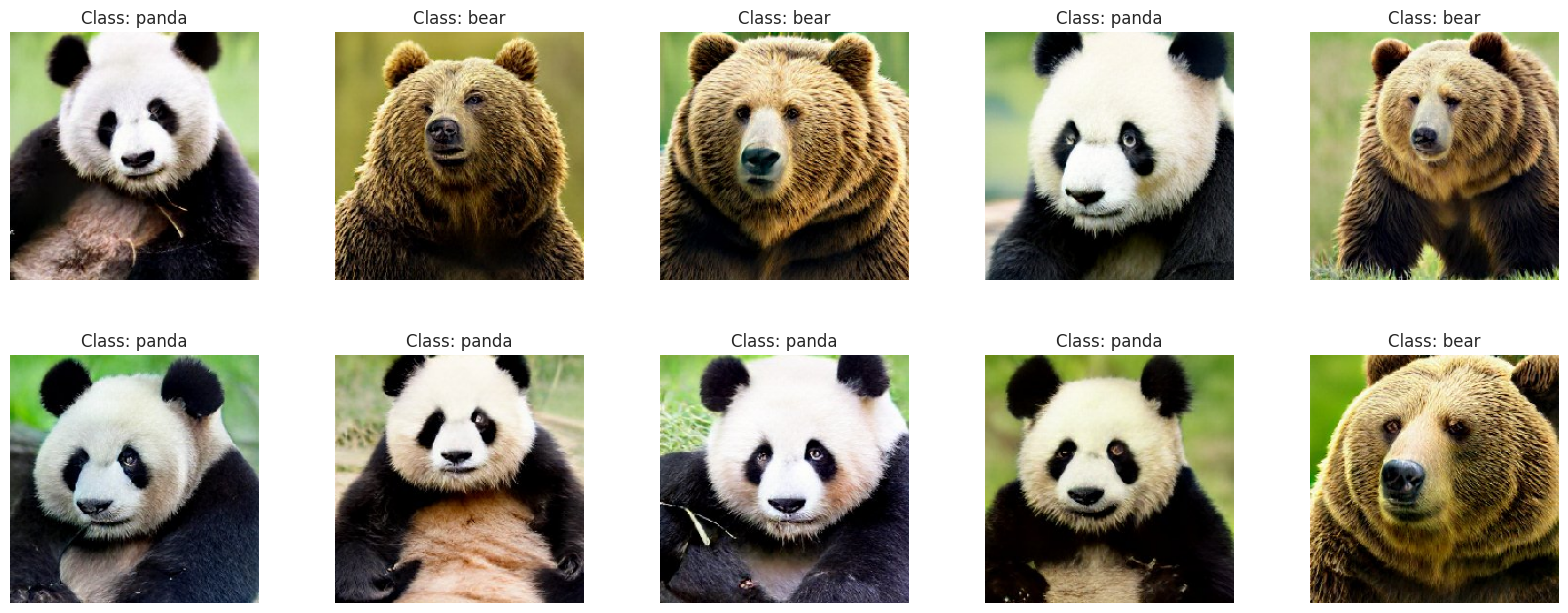

In [32]:
labels = ['bear', 'panda']

samples = next(train_data)
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

## Build CNN Model:

In [31]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax'),
])

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense_1 (Dense)             (None, 128)              

## Training:

In [35]:
cnn_classifier = model.fit(train_data, batch_size = 32,
                                 epochs = 10,
                                 validation_data = val_data,
                                 verbose = 1)

Epoch 1/10
13/13 [==============================] - 11s 414ms/step - loss: 1.8999 - accuracy: 0.8475 - val_loss: 0.2170 - val_accuracy: 0.9200
Epoch 2/10
13/13 [==============================] - 2s 179ms/step - loss: 0.0212 - accuracy: 0.9950 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 2s 186ms/step - loss: 0.0042 - accuracy: 0.9975 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 2s 184ms/step - loss: 4.4331e-04 - accuracy: 1.0000 - val_loss: 2.9020e-04 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 2s 183ms/step - loss: 2.4308e-04 - accuracy: 1.0000 - val_loss: 2.0920e-04 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 3s 231ms/step - loss: 1.0174e-04 - accuracy: 1.0000 - val_loss: 1.2097e-04 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 3s 206ms/step - loss: 6.6489e-05 - accuracy: 1.0000 - val_loss: 1.0170e

## Model Evaluation:

In [36]:
model.evaluate(val_data)

4/4 [==============================] - 0s 99ms/step - loss: 4.7665e-05 - accuracy: 1.0000


[4.766462370753288e-05, 1.0]

In [37]:
def model_performance_graphs():

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(cnn_classifier.epoch, cnn_classifier.history['accuracy'], label = 'acc')
    axes[0].plot(cnn_classifier.epoch, cnn_classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(cnn_classifier.epoch, cnn_classifier.history['loss'], label = 'loss')
    axes[1].plot(cnn_classifier.epoch, cnn_classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()

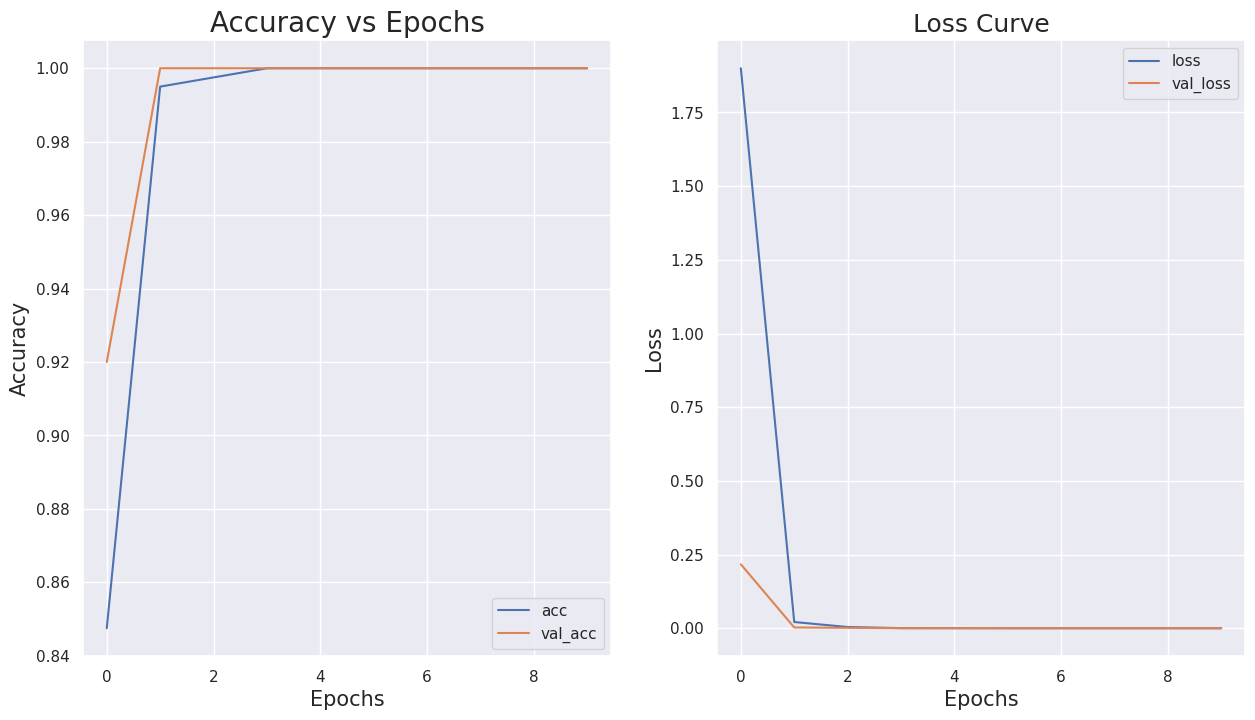

In [38]:
model_performance_graphs()